In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1,2.0,1.0,3.0,1.0,1
680,5,NaN,10.0,10,NaN,10.0,5.0,6.0,3
681,1,1.0,1.0,3,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	6
float64		column 3	21
int64		column 4	0
float64		column 5	9
float64		column 6	3
float64		column 7	12
float64		column 8	3
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,677.000000,662.000000,683.000000,674.000000,680.000000,671.000000,680.000000,683.000000
mean,4.442167,3.131462,3.228097,2.830161,3.228487,3.552941,3.453055,2.864706,1.603221
std,2.820761,3.047771,2.988773,2.864562,2.215980,3.649216,2.465363,3.045447,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.250000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

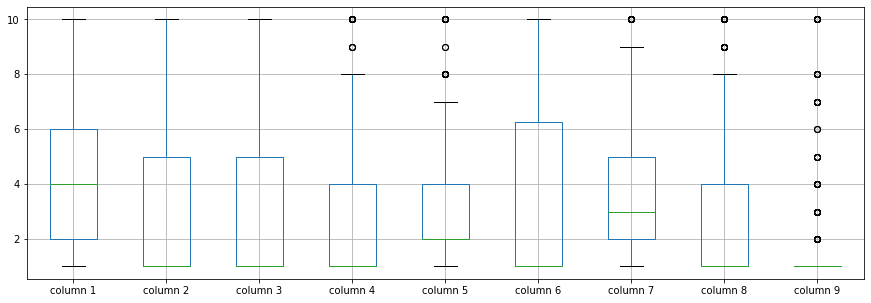

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.131462
column 3    3.228097
column 4    2.830161
column 5    3.228487
column 6    3.552941
column 7    3.453055
column 8    2.864706
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.639790,0.648534,0.487829,0.526193,0.592891,0.557537,0.530207,0.350957
column 2,0.639790,1.000000,0.905375,0.702127,0.751506,0.686144,0.759499,0.715311,0.455627
column 3,0.648534,0.905375,1.000000,0.686239,0.719331,0.713081,0.738881,0.714363,0.439662
column 4,0.487829,0.702127,0.686239,1.000000,0.589106,0.670245,0.669160,0.599238,0.418898
column 5,0.526193,0.751506,0.719331,0.589106,1.000000,0.581099,0.618903,0.633304,0.485986
column 6,0.592891,0.686144,0.713081,0.670245,0.581099,1.000000,0.681775,0.580869,0.338757
column 7,0.557537,0.759499,0.738881,0.669160,0.618903,0.681775,1.000000,0.668590,0.356755
column 8,0.530207,0.715311,0.714363,0.599238,0.633304,0.580869,0.668590,1.000000,0.431038
column 9,0.350957,0.455627,0.439662,0.418898,0.485986,0.338757,0.356755,0.431038,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [9,9+87,9+87+87,9+87+87,9+87+87+87+87,9+87+87+87,9+87+87,9+87,9], vae_layer = False, seed = 870)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.42502625783285
Epoch: 1 , loss: 36.48077701386951
Epoch: 2 , loss: 36.18937158584595
Epoch: 3 , loss: 34.25342886788504
Epoch: 4 , loss: 32.38875566210066
Epoch: 5 , loss: 31.883952640351794
Epoch: 6 , loss: 31.568356059846423
Epoch: 7 , loss: 30.707112312316895
Epoch: 8 , loss: 30.66238866533552
Epoch: 9 , loss: 29.74973928360712
Epoch: 10 , loss: 29.207298960004533
Epoch: 11 , loss: 28.671843664986746
Epoch: 12 , loss: 27.68240819658552
Epoch: 13 , loss: 27.1843748546782
Epoch: 14 , loss: 26.956881704784575
Epoch: 15 , loss: 26.068479810442245
Epoch: 16 , loss: 26.611010188148136
Epoch: 17 , loss: 25.788699036552792
Epoch: 18 , loss: 25.334176563081286
Epoch: 19 , loss: 25.959838821774436
Epoch: 20 , loss: 25.315334388187953
Epoch: 21 , loss: 24.944609460376558
Epoch: 22 , loss: 24.207503273373558
Epoch: 23 , loss: 23.942645981198265
Epoch: 24 , loss: 24.608424073173886
Epoch: 25 , loss: 23.9298960

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [13]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
1,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
2,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
3,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
4,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
679,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0
680,0,-7.569367,0.0,0,-1.740913,0.0,0.0,0.0,0
681,0,0.000000,0.0,0,0.000000,0.0,0.0,0.0,0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(17.573514357289067, 335.3281974424459)

In [18]:
NRMS=numerator/denominator
NRMS


0.05240690908585252

In [19]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.000000,1.0,1,2.000000,1.0,3.0,1.0,1
1,5,4.000000,4.0,5,7.000000,10.0,3.0,2.0,1
2,3,1.000000,1.0,1,2.000000,2.0,3.0,1.0,1
3,6,8.000000,8.0,1,3.000000,4.0,3.0,7.0,1
4,4,1.000000,1.0,3,2.000000,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.000000,1.0,1,2.000000,1.0,2.0,1.0,1
679,2,1.000000,1.0,1,2.000000,1.0,3.0,1.0,1
680,5,2.430633,10.0,10,2.259087,10.0,5.0,6.0,3
681,1,1.000000,1.0,3,2.000000,1.0,1.0,1.0,1


In [21]:
imputations[-1].to_excel("BCW_AL_1(imp).xlsx", index=False, header=False)